<a href="https://colab.research.google.com/github/ceska68/Exercicios/blob/main/Volvo_Bastien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volvo (nome do grupo)

Estimativa de Valores de Horímetro das Máquinas da frota circulante

**Drive**: https://drive.google.com/drive/folders/1HS80lS_XzGH7Tz9juk08d2IR65zZ4Cyv

**Trello**: 

**Github**:

## 0 - Informações sobre o projeto (contexto)

## 1 - Import libs

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

## 2 - Read data

In [37]:
# Read data
table_equipments = pd.read_excel('23w06_Equipamentos.xlsx')
table_time_series  = pd.read_excel('23w06_SeriesTemporais_Horimetros.xlsx', header=3)



In [38]:
# Read table_equipments
table_equipments.head()

,Região,País,Dealer,Segmento,Modelo,Chassis ID,PIN17,Delivery Date,Obs.:,Estado,Região.1
0,Hispânico Sul,Argentina,EPSA,Mining,ART,A040F320538,VCEA040FCG0320538,2020-11-26,NaN,San Luis,Argentina
1,Hispânico Sul,Argentina,EPSA,Construction,ART,A30G732052,VCE0A30GCL0732052,2020-06-22,NaN,San Juan,Argentina
2,Hispânico Sul,Argentina,EPSA,Mining,ART,A30G732029,NaN,2019-11-27,Não encontramos com os métodos de pesquisa uti...,Entre Ríos,Argentina
3,Hispânico Sul,Argentina,EPSA,Mining,EXC,EC210282764,VCEC210DH00282764,2019-06-06,NaN,0,Argentina
4,Hispânico Sul,Argentina,EPSA,Forestry,EXC,EC210282811,VCEC210DV00282811,2019-09-13,Não encontramos com os métodos de pesquisa uti...,0,Argentina


In [39]:
# Read table_time_series
table_time_series.head()

,Unnamed: 0,Chassis Id*,Machine History Date Day,Compensated Working Hours By Day
0,NaN,A030F720057,2016-12-09,0.00
1,NaN,A030F720057,2016-12-10,5.75
2,NaN,A030F720057,2016-12-11,8.95
3,NaN,A030F720057,2016-12-12,1.60
4,NaN,A030F720057,2016-12-13,8.20


In [40]:
# Rename columns
table_equipments.rename(columns = {'Chassis ID' : 'ID'}, inplace = True)
table_time_series.rename(columns = {'Chassis Id*' : 'ID',
                        'Machine History Date Day' : 'Day',
                        'Compensated Working Hours By Day': 'Time' }, inplace = True)

# Drop columns
table_time_series.drop('Unnamed: 0', axis = 1,inplace = True)

## 3 - Business Understanding / Data understanding

### Hipóteses

* H0: É possível prever o horímetro da máquina com base no historico de resgistros com
precisão significativamente maior que a fornecida pelo cálculo atual (baseado em médias)

* H1: É possivel utilizar a mesma técnica para os 3 cenários de medição do problema:
Máquinas que enviaram dados nos últimos 4 dias; máquinas que enviaram dados mas não
recententemente; máquinas que nunca enviaram dados.

* H2: A técnica proposta garante resultados independentemente da classe da máquina:
AHL; WL; EXC

* H3: A técnica proposta garante resultados independentemente do segmento de aplicação
da máquina.

* H4: A técnica proposta garante resultados independentemente do país onde a máquina
está localizada

* H5: A técnica proposta garante resultados independentemente do Dealer que realizou a
venda

* H6: A técnica proposta garante resultados independentemente da idade da máquina

### Objetivo:

**Impacto do Projeto**

***Melhor Gestão da Frota Circulante***
* Aumento da eficiência operacional da rede de distribuição
* Antecipação de necessidades dos Clientes
* Aumento da Produtividade das Máquinas (Uptime)
* Identificação de novas oportunidades em vendas de Peças e Serviços não são exploradas
* Aumento de satisfação dos clientes Volvo CE

In [41]:
table_equipments.head()

,Região,País,Dealer,Segmento,Modelo,ID,PIN17,Delivery Date,Obs.:,Estado,Região.1
0,Hispânico Sul,Argentina,EPSA,Mining,ART,A040F320538,VCEA040FCG0320538,2020-11-26,NaN,San Luis,Argentina
1,Hispânico Sul,Argentina,EPSA,Construction,ART,A30G732052,VCE0A30GCL0732052,2020-06-22,NaN,San Juan,Argentina
2,Hispânico Sul,Argentina,EPSA,Mining,ART,A30G732029,NaN,2019-11-27,Não encontramos com os métodos de pesquisa uti...,Entre Ríos,Argentina
3,Hispânico Sul,Argentina,EPSA,Mining,EXC,EC210282764,VCEC210DH00282764,2019-06-06,NaN,0,Argentina
4,Hispânico Sul,Argentina,EPSA,Forestry,EXC,EC210282811,VCEC210DV00282811,2019-09-13,Não encontramos com os métodos de pesquisa uti...,0,Argentina


In [42]:
table_time_series.head()

,ID,Day,Time
0,A030F720057,2016-12-09,0.00
1,A030F720057,2016-12-10,5.75
2,A030F720057,2016-12-11,8.95
3,A030F720057,2016-12-12,1.60
4,A030F720057,2016-12-13,8.20


In [43]:
table_equipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Região         63 non-null     object        
 1   País           63 non-null     object        
 2   Dealer         63 non-null     object        
 3   Segmento       63 non-null     object        
 4   Modelo         63 non-null     object        
 5   ID             63 non-null     object        
 6   PIN17          57 non-null     object        
 7   Delivery Date  62 non-null     datetime64[ns]
 8   Obs.:          15 non-null     object        
 9   Estado         63 non-null     object        
 10  Região.1       63 non-null     object        
dtypes: datetime64[ns](1), object(10)
memory usage: 5.5+ KB


In [44]:
table_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118161 entries, 0 to 118160
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      118161 non-null  object        
 1   Day     118161 non-null  datetime64[ns]
 2   Time    118161 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.7+ MB


In [45]:
table_equipments.describe()

<ipython-input-45-0b85796f827e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  table_equipments.describe()


,Região,País,Dealer,Segmento,Modelo,ID,PIN17,Delivery Date,Obs.:,Estado,Região.1
count,63,63,63,63,63,63,57,62,15,63,63
unique,3,3,7,5,3,63,57,60,12,29,7
top,Brasil,Brasil,Tecnoeste,Mining,ART,A040F320538,VCEA040FCG0320538,2018-06-15 00:00:00,Não existe articulado na Dinâmica no CareTrack.,Minas Gerais,Sudeste
freq,45,45,10,23,21,1,1,2,3,9,14
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-09 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-19 00:00:00,NaN,NaN,NaN


In [46]:
table_time_series.describe()

,Time
count,118161.000000
mean,5.803329
std,6.365152
min,0.000000
25%,0.038235
50%,4.200000
75%,9.200000
max,85.450000


In [47]:
table_equipments.ID.nunique()

63

In [48]:
table_time_series.ID.nunique()

62

In [49]:
id_equipments = table_equipments.ID.unique().tolist()
id_time_series = table_time_series.ID.unique().tolist()

In [50]:
table_equipments.query('ID != @id_time_series')

,Região,País,Dealer,Segmento,Modelo,ID,PIN17,Delivery Date,Obs.:,Estado,Região.1
47,Brasil,Brasil,Tracbel,Mining,ART,A30F720054,VCEA030FLF0720054,2016-10-13,NaN,Minas Gerais,Sudeste


In [51]:
table_time_series.query('ID != @id_equipments')

,ID,Day,Time


In [52]:
@interact(agg_fun = ['sum', 'mean','max'])

def funcao(agg_fun):
    df = table_time_series.groupby('ID', sort = 'Time')[['Time']].agg(agg_fun)\
              .reset_index()\
              .sort_values('Time', ascending = False)\
              .head(25)
    
    return df

interactive(children=(Dropdown(description='agg_fun', options=('sum', 'mean', 'max'), value='sum'), Output()),…

In [53]:
@interact(id = table_time_series.ID.unique().tolist())
def plot(id):
    plt.figure(figsize= (16,3))
    ax = sns.lineplot(data = table_time_series[table_time_series.ID == id],
                      x = 'Day',
                      y = 'Time')   
    plt.show()


interactive(children=(Dropdown(description='id', options=('A030F720057', 'A040F320538', 'A040F320657', 'A040F3…

In [54]:
# Join table
table_final = pd.merge(table_time_series, table_equipments, on='ID', how='inner')

# Read new table
table_final.head()

,ID,Day,Time,Região,País,Dealer,Segmento,Modelo,PIN17,Delivery Date,Obs.:,Estado,Região.1
0,A030F720057,2016-12-09,0.00,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
1,A030F720057,2016-12-10,5.75,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
2,A030F720057,2016-12-11,8.95,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
3,A030F720057,2016-12-12,1.60,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
4,A030F720057,2016-12-13,8.20,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul


In [55]:
# Delete time over 24h
table_final = table_final[table_final['Time'] < 24]

# Read new table
table_final.head()

,ID,Day,Time,Região,País,Dealer,Segmento,Modelo,PIN17,Delivery Date,Obs.:,Estado,Região.1
0,A030F720057,2016-12-09,0.00,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
1,A030F720057,2016-12-10,5.75,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
2,A030F720057,2016-12-11,8.95,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
3,A030F720057,2016-12-12,1.60,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
4,A030F720057,2016-12-13,8.20,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul


In [56]:
# Group by ID and mean of Time
table_final_mean_time = table_final.groupby('ID').mean()

# Check result
print(table_final_mean_time)

                  Time
ID                    
A030F720057   6.418113
A040F320538   2.885249
A040F320657  14.634921
A040F320672   4.596603
A30F072791   11.444465
...                ...
L60F073972   13.970668
L60F074089    4.675977
L60F074104    4.625585
L60F074121    3.002154
L60F074213    6.422609

[62 rows x 1 columns]


<ipython-input-56-90e9759087da>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table_final_mean_time = table_final.groupby('ID').mean()


In [57]:
# Group by Região and count IDs
table_final_count_regiao = table_final.groupby('Região')['ID'].nunique()

# Check result
print(table_final_count_regiao)

Região
Brasil             44
Hispânico Norte     9
Hispânico Sul       9
Name: ID, dtype: int64


In [58]:
# Group by Pais and count IDs
table_final_count_pais = table_final.groupby('País')['ID'].nunique()

# Check result
print(table_final_count_pais)

País
Argentina     9
Brasil       44
México        9
Name: ID, dtype: int64


In [59]:
# Group by Estado and count IDs
table_final_count_estado = table_final.groupby('Estado')['ID'].nunique()

# Check result
print(table_final_count_estado)

Estado
0                            3
Bahia                        3
Catamarca Province           1
Coahuila de Zaragoza         1
Entre Ríos                   1
Estado de México             1
Hidalgo                      1
Jujuy                        1
Mato Grosso                  5
Mato Grosso do Sul           3
Minas Gerais                 8
Misiónes                     1
Nuevo León                   2
Paraná                       3
Pará                         1
Pernambuco                   2
Provincia de Buenos Aires    1
Querétaro                    1
Rio Grande do Norte          1
Rio Grande do Sul            6
Rio de Janeiro               1
Rondônia                     4
San Juan                     1
San Luis                     1
Santa Catarina               1
Sergipe                      2
São Paulo                    4
Tabasco                      1
Veracruz                     1
Name: ID, dtype: int64


In [60]:
# Group by Dealer and count IDs
table_final_count_dealer = table_final.groupby('Dealer')['ID'].nunique()

# Check result
print(table_final_count_dealer)

Dealer
Ascendum       9
Dinâmica       9
EPSA           9
Gotemburgo     9
Linck          9
Tecnoeste     10
Tracbel        7
Name: ID, dtype: int64


In [61]:
# Group by Segmento and count IDs
table_final_count_segmento = table_final.groupby('Segmento')['ID'].nunique()

# Check result
print(table_final_count_segmento)

Segmento
Agriculture     14
Construction    18
Forestry         2
Industry         6
Mining          22
Name: ID, dtype: int64


In [62]:
# Group by Modelo and count IDs
table_final_count_modelo = table_final.groupby('Modelo')['ID'].nunique()

# Check result
print(table_final_count_modelo)

Modelo
ART    20
EXC    21
WLO    21
Name: ID, dtype: int64


Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

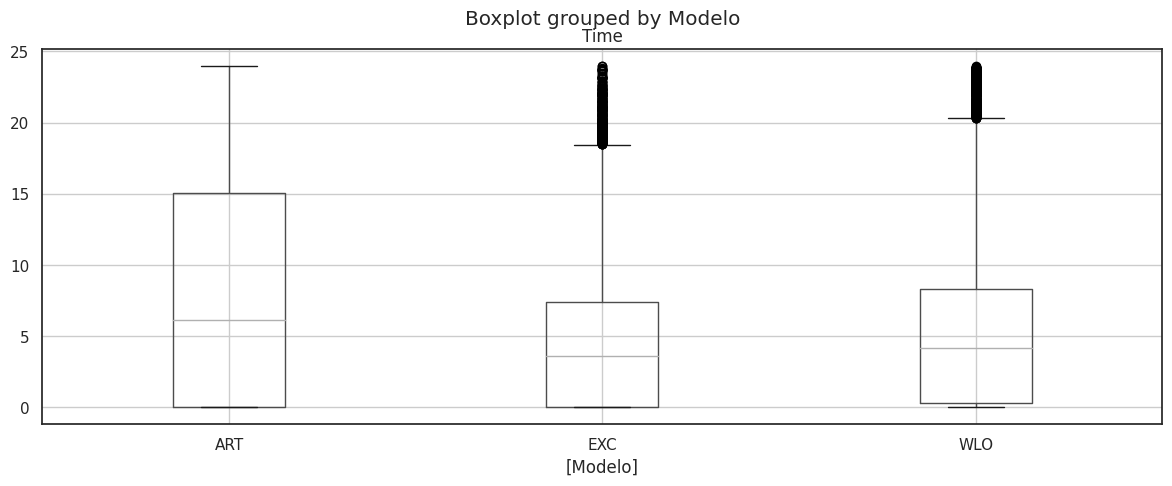

In [63]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by Modelo
table_final.boxplot(by='Modelo', return_type='axes')
     

Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

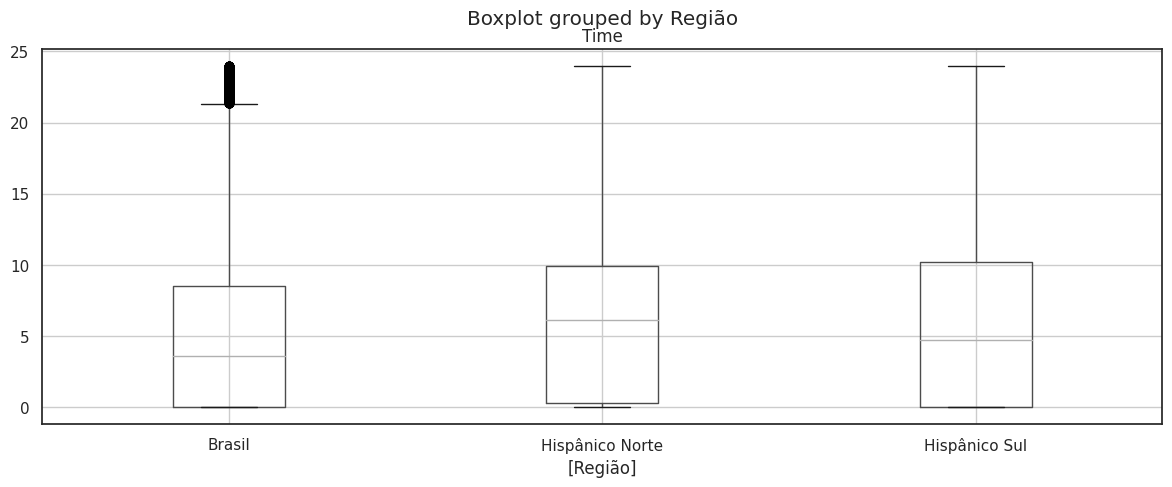

In [64]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by Região
table_final.boxplot(by='Região', return_type='axes')

Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

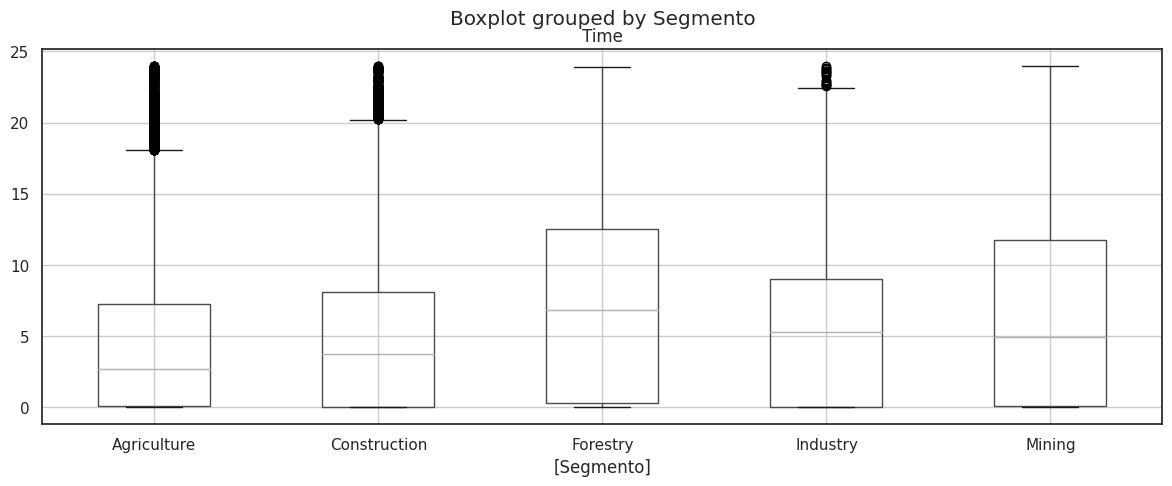

In [65]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by Segmento
table_final.boxplot(by='Segmento', return_type='axes')

Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

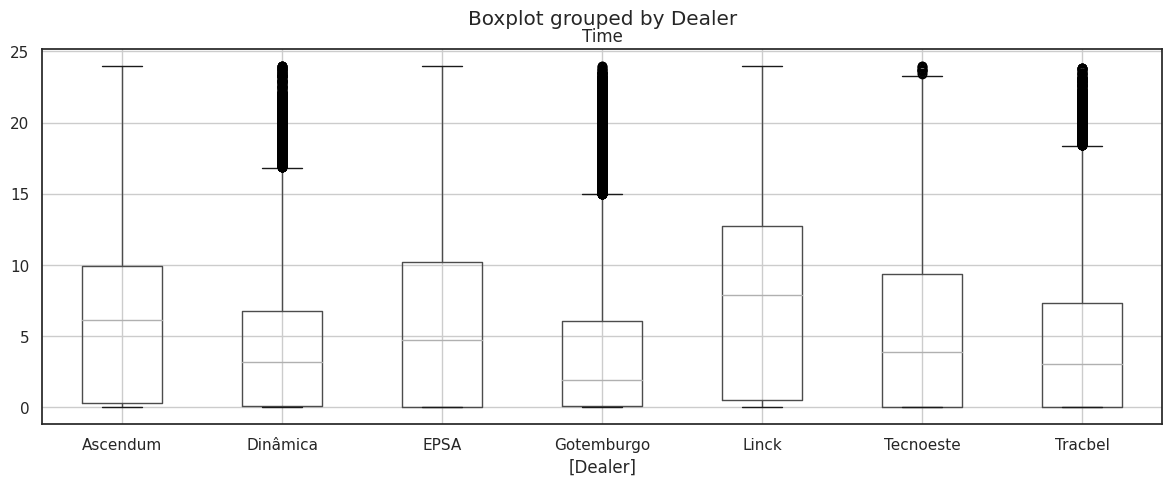

In [66]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by Dealer
table_final.boxplot(by='Dealer', return_type='axes')

Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

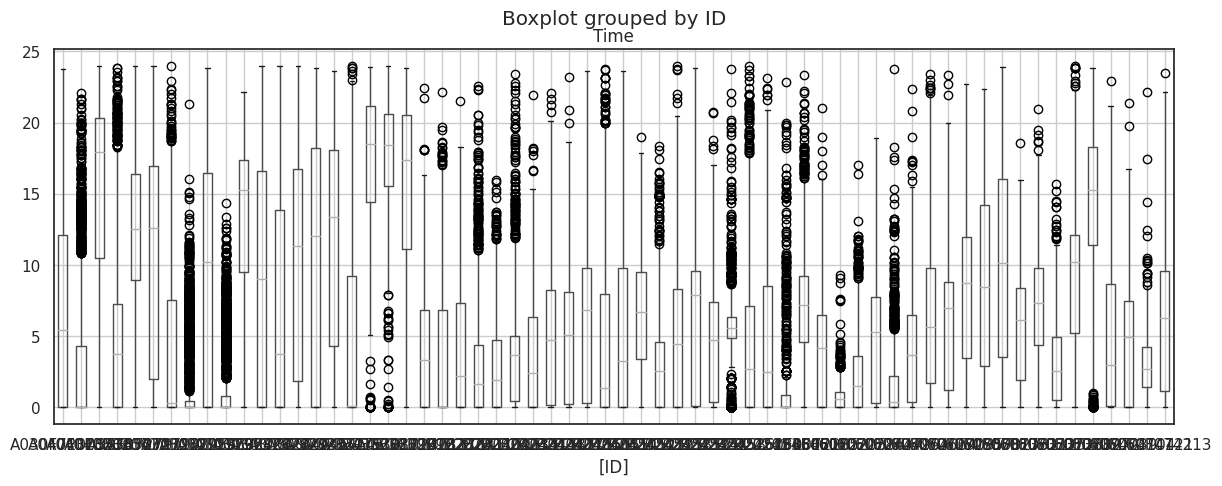

In [67]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by ID
table_final.boxplot(by='ID', return_type='axes')

In [76]:
# Test Post-hoc with Time and Segmento
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = table_final['Time'],
                  groups = table_final['Segmento'],
                  alpha = 0.05)
)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
 Agriculture Construction   0.4832   0.0  0.3523  0.6142   True
 Agriculture     Forestry   3.0591   0.0  2.7635  3.3548   True
 Agriculture     Industry    1.035   0.0  0.8494  1.2206   True
 Agriculture       Mining   2.3988   0.0  2.2703  2.5274   True
Construction     Forestry   2.5759   0.0  2.2866  2.8652   True
Construction     Industry   0.5517   0.0  0.3764  0.7271   True
Construction       Mining   1.9156   0.0  1.8023  2.0288   True
    Forestry     Industry  -2.0242   0.0  -2.342 -1.7063   True
    Forestry       Mining  -0.6603   0.0 -0.9485 -0.3721   True
    Industry       Mining   1.3639   0.0  1.1902  1.5375   True
---------------------------------------------------------------


In [77]:
# Test Post-hoc with Time and Dealer
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = table_final['Time'],
                  groups = table_final['Dealer'],
                  alpha = 0.05)
)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
  Ascendum   Dinâmica  -2.1022    0.0 -2.2923 -1.9122   True
  Ascendum       EPSA  -0.7106    0.0 -0.8959 -0.5254   True
  Ascendum Gotemburgo  -2.7103    0.0 -2.8879 -2.5328   True
  Ascendum      Linck   0.8956    0.0  0.7079  1.0833   True
  Ascendum  Tecnoeste  -1.3736    0.0  -1.545 -1.2023   True
  Ascendum    Tracbel  -2.1749    0.0 -2.3558 -1.9939   True
  Dinâmica       EPSA   1.3916    0.0  1.1899  1.5932   True
  Dinâmica Gotemburgo  -0.6081    0.0 -0.8028 -0.4135   True
  Dinâmica      Linck   2.9978    0.0  2.7939  3.2017   True
  Dinâmica  Tecnoeste   0.7286    0.0  0.5397  0.9175   True
  Dinâmica    Tracbel  -0.0727 0.9331 -0.2704  0.1251  False
      EPSA Gotemburgo  -1.9997    0.0 -2.1896 -1.8098   True
      EPSA      Linck   1.6062    0.0  1.4069  1.8056   True
      EPSA  Tecnoeste   

In [78]:
# Test Post-hoc with Time and Modelo
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = table_final['Time'],
                  groups = table_final['Modelo'],
                  alpha = 0.05)
)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   ART    EXC  -3.4198   0.0 -3.5194 -3.3203   True
   ART    WLO  -2.6407   0.0 -2.7383  -2.543   True
   EXC    WLO   0.7792   0.0  0.6856  0.8728   True
---------------------------------------------------


In [80]:
# Test Post-hoc with Time and Região
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = table_final['Time'],
                  groups = table_final['Região'],
                  alpha = 0.05)
)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
         Brasil Hispânico Norte   1.5439   0.0  1.4343  1.6535   True
         Brasil   Hispânico Sul   0.8332   0.0  0.7109  0.9555   True
Hispânico Norte   Hispânico Sul  -0.7106   0.0 -0.8601 -0.5612   True
---------------------------------------------------------------------


In [82]:
import statsmodels.api as sm

# Criar variáveis dummy para as variáveis qualitativas
table_final_dummies = pd.get_dummies(table_final[['Segmento', 'Modelo', 'Dealer', 'Região']])

# Concatenar as variáveis quantitativas com as variáveis dummy
table_final_concat = pd.concat([table_final['Time'], table_final_dummies], axis=1)

# Adicionar uma coluna constante para o termo de interceptação
table_final_concat = sm.add_constant(table_final_concat)

# Realizar a regressão linear múltipla
model = sm.OLS(table_final['Time'], table_final_concat)
results = model.fit()

# Imprimir os resultados da regressão
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.059e+33
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:28:42   Log-Likelihood:             3.6280e+06
No. Observations:              117254   AIC:                        -7.256e+06
Df Residuals:                  117240   BIC:                        -7.256e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.87

# Observações / ideias 

* O que fazer com os casos com quantidade de hora trabalhada superior a 24hrs